In [ ]:
# FastText 설치 전에 pyemd 설치 하기
! pip install pyemd

In [1]:
# Word2Vec 모델 불러오기
from gensim.models import Word2Vec
# FastText 모델 불러오기
from gensim.models.fasttext import FastText

import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd

In [4]:
# 데이터 불러오기
df = pd.read_excel(r'C:\Users\HONG\Desktop\HONGYP\한이음\데이터\진료과 전처리 후\질환백과 크롤링 데이터 (진료과 전처리 및 적합 질병명 데이터).xlsx', encoding = 'cp949')

In [5]:
df.drop(["Unnamed: 0"], axis = 1, inplace = True)

In [6]:
# Okt 불러오기
import konlpy.tag
mecab = konlpy.tag.Mecab(dicpath=r"C:\mecab\mecab-ko-dic")

In [7]:
df.head()

,질환명,증상,진료과,원인,상세증상,치료,url_list
0,수족냉증(Coldness of hands and feet),"환부 냉감, 시림",가정의학과,수족냉증은 추위 등 외부 자극에 의해 혈관이 수축되면서 손발 같은 말초 부위에 혈액...,수족냉증 환자는 따뜻한 곳에서도 손발의 냉감을 호소합니다. 때로는 무릎이 시리며 아...,수족냉증의 원인 질환이 있으면 그것을 치료해야 합니다. 이와 더불어 생활 습관을 교...,http://www.amc.seoul.kr/asan/healthinfo/diseas...
1,냉방병(Air-conditioningitis),"설사, 권태감, 복부 불편감, 소화불량, 코막힘, 재채기, 콧물",가정의학과,냉방병은 신체 기능이 여름 온도에 적응된 상태에서 지나치게 차가운 한랭 환경이 오랫...,"뇌의 혈류량이 감소하여 어지럽고 졸릴 수 있으며, 두통이 발생할 수 있습니다. 장운...",냉방병의 증상은 대부분 냉방 환경을 개선하면 호전됩니다. 그러나 이러한 증상으로 인...,http://www.amc.seoul.kr/asan/healthinfo/diseas...
2,만성 피로 증후군(Chronic Fatigue Syndrome),"전신 통증, 피로감, 권태감, 식욕부진, 기억장애, 수면장애","가정의학과, 노년내과","피로를 유발하는 원인은 다양합니다. 약물이 피로의 원인인 경우도 있습니다. 이뇨제,...",만성 피로 증후군의 증상은 개인마다 다양하게 나타날 수 있습니다. 만성 피로 증후군...,만성 피로 증후군에 대한 특별한 치료법은 없습니다. 환자의 증상 개선에 비교적 효과...,http://www.amc.seoul.kr/asan/healthinfo/diseas...
3,식중독(Foodborne illness),"두드러기, 열, 복부 통증, 설사, 구토","가정의학과, 소화기내과",식중독을 일으키는 원인균은 다양합니다. ① 포도상구균포도상구균은 자연계에 널리 분포...,식중독의 잠복기와 증상의 정도는 원인 물질에 따라 다르게 나타납니다. ① 포도상구균...,식중독 증상으로 발생하는 설사와 구토에 의한 탈수를 치료하기 위해 경구나 정맥주사를...,http://www.amc.seoul.kr/asan/healthinfo/diseas...
4,소화불량(Dyspepsia),"복부 통증, 체중감소, 트림, 구토, 가슴 쓰림, 포만감, 식후 불쾌감","가정의학과, 소화기내과, 노년내과",소화불량은 음식을 섭취한 후 일어나는 소화 장애 증상을 총칭하는 용어입니다. 소화불...,"소화불량의 원인은 소화기 질환, 심장 질환, 전신적인 질환, 정신적인 질환을 포함하...","소화불량을 유발하는 질환은 소화기 질환뿐만 아니라 심장 질환, 전신적인 질환, 정신...",http://www.amc.seoul.kr/asan/healthinfo/diseas...


In [8]:
df['상세증상'][0].split('.')

['수족냉증 환자는 따뜻한 곳에서도 손발의 냉감을 호소합니다',
 ' 때로는 무릎이 시리며 아랫배, 허리 등 다양한 신체 부위에서 냉기를 느끼기도 합니다',
 ' 남성보다 여성, 특히 출산을 끝낸 여성이나 40대 이상의 중년 여성에게 더 많이 나타납니다',
 ' 수족냉증이 중년 여성에게서 많이 발생하는 이유는 여성이 남성에 비해 호르몬의 변화가 크기 때문이며, 정서적으로 긴장을 많이 하고 예민하기 때문이기도 합니다',
 '']

In [9]:
상세증상 = []

for i in range(len(df)):
    element = df['상세증상'][i].split('.')
    상세증상.extend(element)

In [10]:
df_증상 = pd.DataFrame(상세증상, columns = ['상세증상'])

In [11]:
df_증상['상세증상'] = df_증상['상세증상'].map(lambda x : mecab.nouns(x))

In [12]:
# 토큰화된 결과 살펴보기
df_증상['상세증상']

0                             [수족, 냉증, 환자, 곳, 손발, 냉감, 호소]
1                        [무릎, 아랫배, 허리, 등, 다양, 신체, 부위, 냉기]
2                         [남성, 여성, 출산, 여성, 대, 이상, 중년, 여성]
3       [수족, 냉증, 중년, 여성, 발생, 이유, 여성, 남성, 호르몬, 변화, 때문, ...
4                                                      []
5                             [뇌, 혈류, 량, 감소, 수, 통, 발생, 수]
6            [장운동, 변화, 소화, 불량, 복통, 설사, 등, 다양, 위장관, 증상, 수]
7                                    [근육, 수축, 균형, 근육통, 수]
8                           [여성, 경우, 호르몬, 이상, 때문, 생리, 규칙]
9                    [밖, 혈류, 변화, 얼굴, 손, 발, 등, 냉감, 얼굴, 가슴]
10                             [체내, 열, 보충, 열, 생산, 때문, 피로]
11                                   [일부, 환자, 감기, 증상, 호소]
12                                                     []
13                            [만성, 피, 증후군, 증상, 개인, 다양, 수]
14                               [만성, 피, 증후군, 일반, 증상, 다음]
15                               [원인, 피로, 피로, 개월, 이상, 지속]
16              [집중력, 저하, 기억력, 장애, 수면, 장애, 위장, 장애, 등, 증상]
17      [이외, 복

In [13]:
# 토큰화된 리스트로 만들기
import re
df_증상['상세증상'] = df_증상['상세증상'].map(lambda x : re.sub(r'[^\s\w]', '', str(x))).map(lambda x : x.split())

In [14]:
# Word2Vec 모델 학습시키기

model = FastText(df_증상["상세증상"], window = 3, min_count = 2, iter = 200)

In [19]:
# Word2Vec으로 원하는 단어와 유사한 단어 살펴보기
model.wv.similar_by_word("폐렴", topn = 50)

[('폐색', 0.8190272450447083),
 ('전증', 0.8114039897918701),
 ('대사성', 0.6833290457725525),
 ('호흡기', 0.6765129566192627),
 ('상기', 0.660915732383728),
 ('조치', 0.6443341374397278),
 ('산증', 0.6419721841812134),
 ('천', 0.6300753355026245),
 ('기관지염', 0.6293109655380249),
 ('위험', 0.5981199741363525),
 ('고령자', 0.5905870199203491),
 ('병원', 0.5878375172615051),
 ('객혈', 0.5826894044876099),
 ('방문', 0.5759710073471069),
 ('기관지', 0.564362108707428),
 ('전염', 0.5569579005241394),
 ('단독', 0.5329692959785461),
 ('비교', 0.5300267934799194),
 ('인플루엔자', 0.5146492719650269),
 ('혈뇨', 0.511720597743988),
 ('편', 0.4996904730796814),
 ('성인', 0.4947953224182129),
 ('정확', 0.4851579964160919),
 ('급', 0.48272258043289185),
 ('속립', 0.48138242959976196),
 ('말벌', 0.47865402698516846),
 ('권태감', 0.4750541150569916),
 ('늑막염', 0.4733876585960388),
 ('발열', 0.4710692763328552),
 ('탄소', 0.469868004322052),
 ('박테리아', 0.46818891167640686),
 ('배제', 0.46235191822052),
 ('기생충', 0.46139299869537354),
 ('고지혈증', 0.46060478687286377),
 

In [20]:
# 시각화를 위해 단어 리스트 저장

vocabs = list(model.wv.vocab.keys())[:300]
word_vectors_list = [model.wv[v] for v in vocabs]

In [21]:
# scatter plot으로 그리기 위해 PCA를 수행

from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
xys = pca.fit_transform(word_vectors_list)
xs = xys[:, 0]
ys = xys[:, 1]

In [22]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'].insert(0, 'Malgun Gothic')

def plot_2d_graph(vocabs, xs, ys):
    plt.figure(figsize = (8, 6))
    plt.scatter(xs, ys, marker = "o", alpha = 0.5)
    for i, v in enumerate(vocabs):
        plt.annotate(v, xy = (xs[i], ys[i]))
        
%matplotlib inline

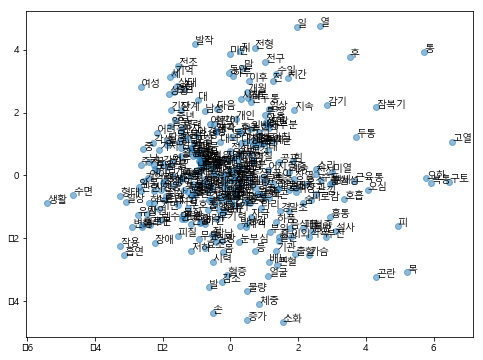

In [23]:
# 위에서 만들어준 함수를 사용해 scatter plot으로 시각화

plot_2d_graph(vocabs, xs, ys)